In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configurazione per grafici più belli
plt.style.use('default')
sns.set_palette("tab10")

print("=== CPU METHODS SCALING ANALYSIS ===")
print("Analisi del parallelismo e scaling dei metodi CPU")
print("Focus su: Thread Scalability, Method Comparison, Efficiency Analysis")

# Carica i dati
try:
    df = pd.read_csv('benchmark_results_CPU_methods_2.csv')
    print(f"✅ CPU Methods data caricati: {len(df)} configurazioni")
    
    # Filtra solo test riusciti
    df = df[df['Success'] == True]
    
    print(f"Range particelle: {df['NumParticles'].min():,} - {df['NumParticles'].max():,}")
    print(f"Range threads: {df['NumThreads'].min()} - {df['NumThreads'].max()}")
    
    # Mostra metodi disponibili
    methods = df.groupby(['ForceMethod', 'IntegrationMethod']).size()
    print(f"\nMetodi disponibili:")
    for (force, integration), count in methods.items():
        print(f"  {force} + {integration}: {count} configurazioni")
    
    # Controllo completeness
    total_configs = len(df['NumParticles'].unique()) * len(df['NumThreads'].unique()) * len(methods)
    completeness = len(df) / total_configs * 100
    print(f"Completeness: {completeness:.1f}% ({len(df)}/{total_configs})")
    
    data_available = True
    
except FileNotFoundError as e:
    print(f"❌ Errore caricamento dati: {e}")
    data_available = False

if data_available:
    print("✅ Dataset CPU methods caricato con successo!")
    print("🎯 Focus: Thread scalability e confronto metodi")
else:
    print("❌ Impossibile procedere senza i dati")

=== CPU METHODS SCALING ANALYSIS ===
Analisi del parallelismo e scaling dei metodi CPU
Focus su: Thread Scalability, Method Comparison, Efficiency Analysis
✅ CPU Methods data caricati: 216 configurazioni
Range particelle: 64 - 16,384
Range threads: 1 - 8

Metodi disponibili:
  ADAPTIVE_MUTUAL + VELOCITY_VERLET: 72 configurazioni
  BARNES_HUT + VELOCITY_VERLET: 72 configurazioni
  PAIRWISE_AVX2/FP32 + VELOCITY_VERLET: 72 configurazioni
Completeness: 100.0% (216/216)
✅ Dataset CPU methods caricato con successo!
🎯 Focus: Thread scalability e confronto metodi


In [2]:
# Analisi preliminare dei metodi
if data_available:
    print("=== ANALISI PRELIMINARE METODI ===")
    
    # Raggruppa i metodi principali
    force_methods = df['ForceMethod'].unique()
    integration_methods = df['IntegrationMethod'].unique()
    
    print(f"Force Methods: {list(force_methods)}")
    print(f"Integration Methods: {list(integration_methods)}")
    
    # Crea combinazioni principali per l'analisi
    main_combinations = []
    for force in force_methods:
        for integration in integration_methods:
            combo_data = df[(df['ForceMethod'] == force) & (df['IntegrationMethod'] == integration)]
            if len(combo_data) >= 10:  # Soglia minima per analisi significativa
                main_combinations.append((force, integration))
    
    print(f"\nCombinazioni per analisi completa: {len(main_combinations)}")
    for force, integration in main_combinations:
        combo_data = df[(df['ForceMethod'] == force) & (df['IntegrationMethod'] == integration)]
        particles_tested = sorted(combo_data['NumParticles'].unique())
        threads_tested = sorted(combo_data['NumThreads'].unique())
        print(f"  {force}+{integration}: {len(combo_data)} configs, "
              f"particles {particles_tested[0]}-{particles_tested[-1]}, "
              f"threads {threads_tested[0]}-{threads_tested[-1]}")
    
    # Identifica il range più completo per l'analisi
    particle_counts = df['NumParticles'].value_counts().sort_index()
    thread_counts = df['NumThreads'].value_counts().sort_index()
    
    print(f"\nDistribuzione test per particelle:")
    for particles, count in particle_counts.items():
        print(f"  {particles:>6,} particles: {count:>3} configurazioni")
    
    print(f"\nDistribuzione test per threads:")
    for threads, count in thread_counts.items():
        print(f"  {threads:>2} threads: {count:>3} configurazioni")

=== ANALISI PRELIMINARE METODI ===
Force Methods: ['PAIRWISE_AVX2/FP32', 'ADAPTIVE_MUTUAL', 'BARNES_HUT']
Integration Methods: ['VELOCITY_VERLET']

Combinazioni per analisi completa: 3
  PAIRWISE_AVX2/FP32+VELOCITY_VERLET: 72 configs, particles 64-16384, threads 1-8
  ADAPTIVE_MUTUAL+VELOCITY_VERLET: 72 configs, particles 64-16384, threads 1-8
  BARNES_HUT+VELOCITY_VERLET: 72 configs, particles 64-16384, threads 1-8

Distribuzione test per particelle:
      64 particles:  24 configurazioni
     128 particles:  24 configurazioni
     256 particles:  24 configurazioni
     512 particles:  24 configurazioni
   1,024 particles:  24 configurazioni
   2,048 particles:  24 configurazioni
   4,096 particles:  24 configurazioni
   8,192 particles:  24 configurazioni
  16,384 particles:  24 configurazioni

Distribuzione test per threads:
   1 threads:  27 configurazioni
   2 threads:  27 configurazioni
   3 threads:  27 configurazioni
   4 threads:  27 configurazioni
   5 threads:  27 configuraz


=== GRAFICO 1: THREAD SCALABILITY ===


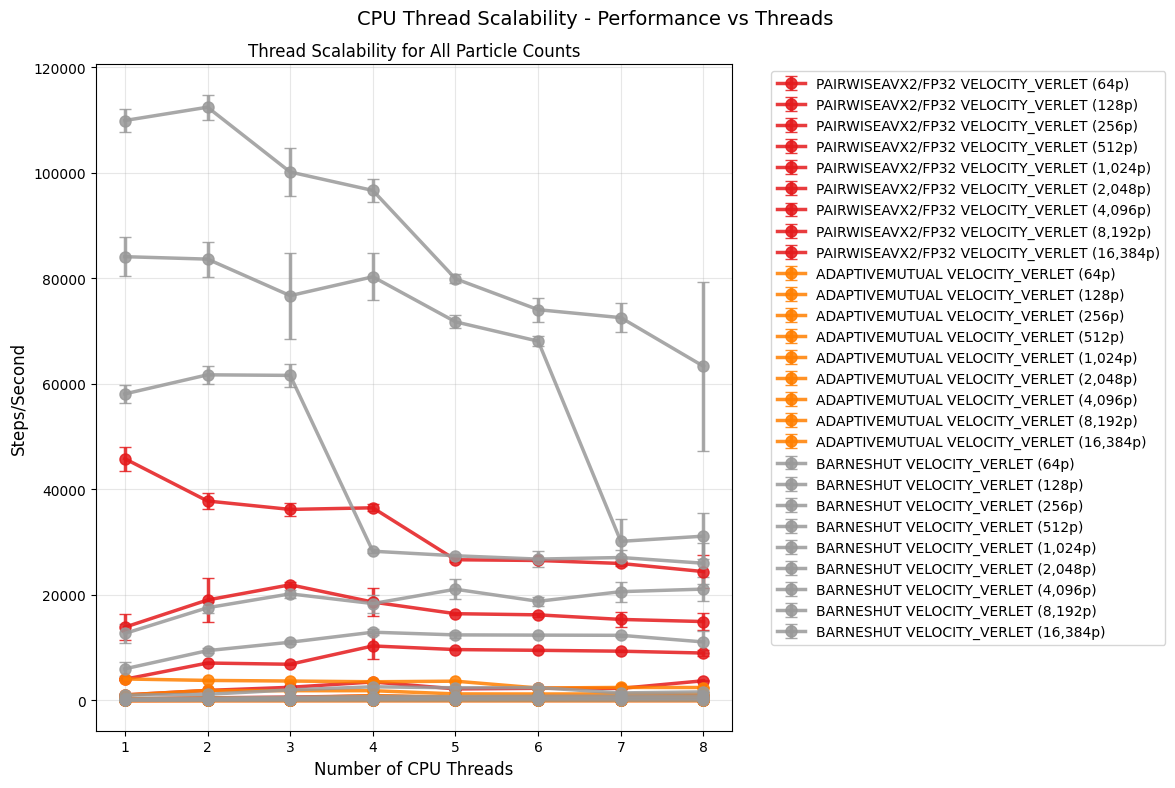


=== GRAFICO 2: THREADING EFFICIENCY ===
PAIRWISE_AVX2/FP32: N=64 efficiency range 6.7% - 100.0%
PAIRWISE_AVX2/FP32: N=128 efficiency range 13.5% - 100.0%
PAIRWISE_AVX2/FP32: N=256 efficiency range 28.0% - 100.0%
PAIRWISE_AVX2/FP32: N=512 efficiency range 31.2% - 100.0%
PAIRWISE_AVX2/FP32: N=1024 efficiency range 39.0% - 100.0%
PAIRWISE_AVX2/FP32: N=2048 efficiency range 45.6% - 100.0%
PAIRWISE_AVX2/FP32: N=4096 efficiency range 46.3% - 100.0%
PAIRWISE_AVX2/FP32: N=8192 efficiency range 48.5% - 100.0%
PAIRWISE_AVX2/FP32: N=16384 efficiency range 49.5% - 100.0%
ADAPTIVE_MUTUAL: N=64 efficiency range 7.5% - 100.0%
ADAPTIVE_MUTUAL: N=128 efficiency range 14.2% - 100.0%
ADAPTIVE_MUTUAL: N=256 efficiency range 29.7% - 100.0%
ADAPTIVE_MUTUAL: N=512 efficiency range 48.6% - 100.0%
ADAPTIVE_MUTUAL: N=1024 efficiency range 44.6% - 100.0%
ADAPTIVE_MUTUAL: N=2048 efficiency range 52.4% - 100.0%
ADAPTIVE_MUTUAL: N=4096 efficiency range 55.6% - 100.0%
ADAPTIVE_MUTUAL: N=8192 efficiency range 58.0% 

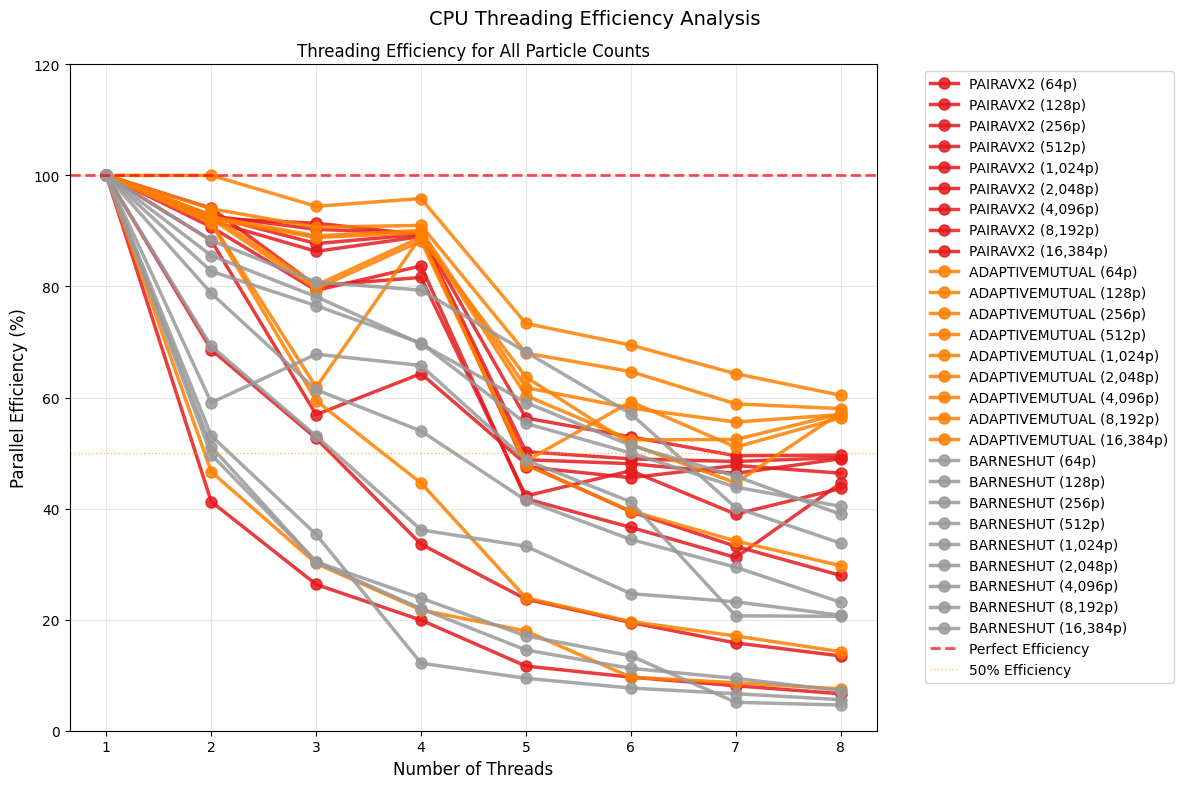


=== GRAFICO 3: METHODS AT OPTIMAL THREADS ===
PAIRWISE_AVX2/FP32+VELOCITY_VERLET, 64p: 45800 steps/sec (1T)
PAIRWISE_AVX2/FP32+VELOCITY_VERLET, 128p: 21911 steps/sec (3T)
PAIRWISE_AVX2/FP32+VELOCITY_VERLET, 256p: 10323 steps/sec (4T)
PAIRWISE_AVX2/FP32+VELOCITY_VERLET, 512p: 3727 steps/sec (8T)
PAIRWISE_AVX2/FP32+VELOCITY_VERLET, 1,024p: 917 steps/sec (8T)
PAIRWISE_AVX2/FP32+VELOCITY_VERLET, 2,048p: 244 steps/sec (8T)
PAIRWISE_AVX2/FP32+VELOCITY_VERLET, 4,096p: 65 steps/sec (8T)
PAIRWISE_AVX2/FP32+VELOCITY_VERLET, 8,192p: 16 steps/sec (8T)
PAIRWISE_AVX2/FP32+VELOCITY_VERLET, 16,384p: 4 steps/sec (8T)
ADAPTIVE_MUTUAL+VELOCITY_VERLET, 64p: 4067 steps/sec (1T)
ADAPTIVE_MUTUAL+VELOCITY_VERLET, 128p: 1891 steps/sec (2T)
ADAPTIVE_MUTUAL+VELOCITY_VERLET, 256p: 924 steps/sec (4T)
ADAPTIVE_MUTUAL+VELOCITY_VERLET, 512p: 293 steps/sec (8T)
ADAPTIVE_MUTUAL+VELOCITY_VERLET, 1,024p: 74 steps/sec (8T)
ADAPTIVE_MUTUAL+VELOCITY_VERLET, 2,048p: 18 steps/sec (8T)
ADAPTIVE_MUTUAL+VELOCITY_VERLET, 4,096p:

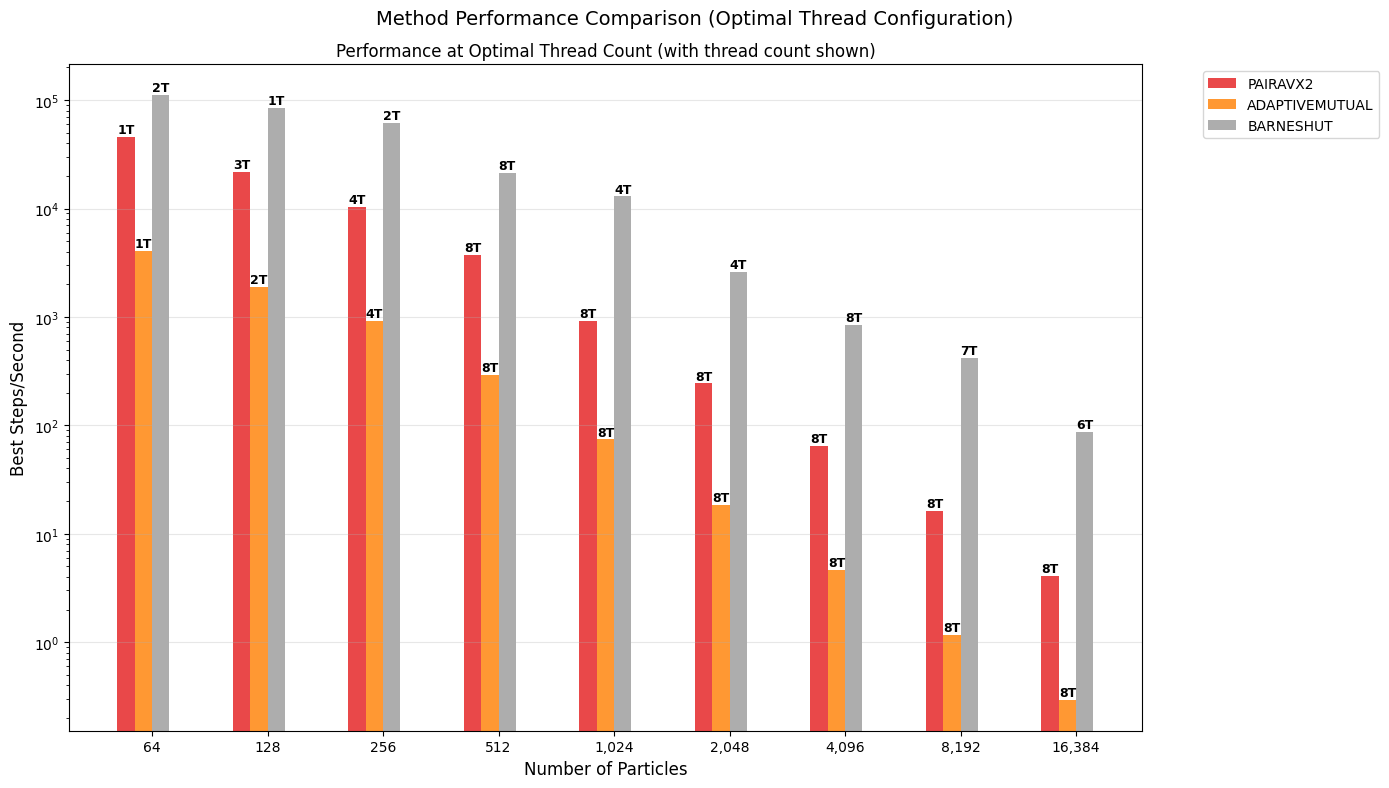

✅ Tutti e 3 i grafici di thread scalability completati con dati reali!


In [9]:
# 1. THREAD SCALABILITY ANALYSIS - CORRETTO

if data_available and len(main_combinations) > 0:
    
    fig1, ax1 = plt.subplots(1, 1, figsize=(12, 8))
    fig1.suptitle('CPU Thread Scalability - Performance vs Threads', fontsize=14)
    
    print("\n=== GRAFICO 1: THREAD SCALABILITY ===")
    
    # Usa tutti i valori di particelle disponibili
    all_particles = sorted(df['NumParticles'].unique())
    colors = plt.cm.Set1(np.linspace(0, 1, len(main_combinations)))
    
    for idx, ((force_method, int_method), color) in enumerate(zip(main_combinations, colors)):
        method_data = df[(df['ForceMethod'] == force_method) & 
                         (df['IntegrationMethod'] == int_method)]
        
        for particles in all_particles:
            particle_data = method_data[method_data['NumParticles'] == particles]
            if len(particle_data) >= 3:
                particle_data_sorted = particle_data.sort_values('NumThreads')
                ax1.errorbar(particle_data_sorted['NumThreads'], 
                            particle_data_sorted['MeanStepsPerSecond'],
                            yerr=particle_data_sorted['StdStepsPerSecond'] if 'StdStepsPerSecond' in particle_data_sorted.columns else None,
                            fmt='o-', label=f'{force_method.replace("_", "")} {int_method} ({particles:,}p)', 
                            color=color, linewidth=2.5, markersize=8, capsize=4, alpha=0.85)
    
    ax1.set_xlabel('Number of CPU Threads', fontsize=12)
    ax1.set_ylabel('Steps/Second', fontsize=12)
    ax1.set_title('Thread Scalability for All Particle Counts', fontsize=12)
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    # GRAFICO 2: Efficiency vs Threads
    fig2, ax2 = plt.subplots(1, 1, figsize=(12, 8))
    fig2.suptitle('CPU Threading Efficiency Analysis', fontsize=14)
    
    print("\n=== GRAFICO 2: THREADING EFFICIENCY ===")
    
    for idx, ((force_method, int_method), color) in enumerate(zip(best_methods[:3], colors)):
        method_data = df[(df['ForceMethod'] == force_method) & 
                         (df['IntegrationMethod'] == int_method)]
        
        # Usa tutti i valori di particelle disponibili
        for particles in all_particles:
            particle_data = method_data[method_data['NumParticles'] == particles]
            if len(particle_data) >= 4:
                particle_data_sorted = particle_data.sort_values('NumThreads')
                
                # Calcola parallel efficiency
                baseline = particle_data_sorted[particle_data_sorted['NumThreads'] == 1]['MeanStepsPerSecond']
                if not baseline.empty:
                    baseline_perf = baseline.iloc[0]
                    
                    efficiencies = []
                    thread_counts = []
                    
                    for _, row in particle_data_sorted.iterrows():
                        threads = row['NumThreads']
                        if threads > 0:
                            actual_speedup = row['MeanStepsPerSecond'] / baseline_perf
                            efficiency = (actual_speedup / threads) * 100  # Percentage
                            
                            if efficiency <= 200:  # Filtro valori anomali
                                efficiencies.append(efficiency)
                                thread_counts.append(threads)
                    
                    if len(efficiencies) >= 3:
                        ax2.plot(thread_counts, efficiencies, 'o-', 
                                label=f'{force_method.replace("_", "").replace("PAIRWISE", "PAIR").replace("AVX2/FP32", "AVX2")} ({particles:,}p)',
                                color=color, linewidth=2.5, markersize=8, alpha=0.85)
                        
                        print(f"{force_method}: N={particles} efficiency range {min(efficiencies):.1f}% - {max(efficiencies):.1f}%")
    
    ax2.axhline(y=100, color='red', linestyle='--', alpha=0.7, linewidth=2, label='Perfect Efficiency')
    ax2.axhline(y=50, color='orange', linestyle=':', alpha=0.7, linewidth=1, label='50% Efficiency')
    ax2.set_xlabel('Number of Threads', fontsize=12)
    ax2.set_ylabel('Parallel Efficiency (%)', fontsize=12)
    ax2.set_title('Threading Efficiency for All Particle Counts', fontsize=12)
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(0, 120)
    
    plt.tight_layout()
    plt.show()
    
    # GRAFICO 3: Method Comparison at Optimal Thread Count
    fig3, ax3 = plt.subplots(1, 1, figsize=(14, 8))
    fig3.suptitle('Method Performance Comparison (Optimal Thread Configuration)', fontsize=14)
    
    print("\n=== GRAFICO 3: METHODS AT OPTIMAL THREADS ===")
    
    comparison_particles = all_particles
    x_pos = np.arange(len(comparison_particles))
    width = 0.15
    
    for idx, (force_method, int_method) in enumerate(best_methods[:4]):
        performances = []
        thread_counts = []
        
        for particles in comparison_particles:
            method_data = df[(df['ForceMethod'] == force_method) & 
                            (df['IntegrationMethod'] == int_method) & 
                            (df['NumParticles'] == particles)]
            
            if not method_data.empty:
                # Trova la migliore configurazione di thread per questo N
                best_config = method_data.loc[method_data['MeanStepsPerSecond'].idxmax()]
                performances.append(best_config['MeanStepsPerSecond'])
                thread_counts.append(best_config['NumThreads'])
                print(f"{force_method}+{int_method}, {particles:,}p: {best_config['MeanStepsPerSecond']:.0f} steps/sec ({best_config['NumThreads']}T)")
            else:
                performances.append(0)
                thread_counts.append(0)
        
        if any(p > 0 for p in performances):
            bars = ax3.bar(x_pos + idx * width, performances, width, 
                          label=f'{force_method.replace("_", "").replace("PAIRWISE", "PAIR").replace("AVX2/FP32", "AVX2")}',
                          alpha=0.8, color=colors[idx])
            
            # Aggiungi il numero di thread ottimale sopra ogni barra
            for i, (perf, threads) in enumerate(zip(performances, thread_counts)):
                if perf > 0:
                    ax3.text(x_pos[i] + idx * width, perf + perf*0.02, f'{threads}T', 
                            ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    ax3.set_xlabel('Number of Particles', fontsize=12)
    ax3.set_ylabel('Best Steps/Second', fontsize=12)
    ax3.set_title('Performance at Optimal Thread Count (with thread count shown)', fontsize=12)
    ax3.set_xticks(x_pos + width * 1.5)
    ax3.set_xticklabels([f'{p:,}' for p in comparison_particles])
    ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax3.grid(True, alpha=0.3, axis='y')
    ax3.set_yscale('log')
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Tutti e 3 i grafici di thread scalability completati con dati reali!")

else:
    print("❌ Dati insufficienti per l'analisi thread scalability")


=== GRAFICO 2: CONFRONTO METODI ===

64 particles:
  PAIRWISE_AVX2/FP32+VELOCITY_VERLET: 45800 steps/sec (1 threads)
  ADAPTIVE_MUTUAL+VELOCITY_VERLET: 4067 steps/sec (1 threads)
  BARNES_HUT+VELOCITY_VERLET: 112398 steps/sec (2 threads)

128 particles:
  PAIRWISE_AVX2/FP32+VELOCITY_VERLET: 21911 steps/sec (3 threads)
  ADAPTIVE_MUTUAL+VELOCITY_VERLET: 1891 steps/sec (2 threads)
  BARNES_HUT+VELOCITY_VERLET: 84076 steps/sec (1 threads)

256 particles:
  PAIRWISE_AVX2/FP32+VELOCITY_VERLET: 10323 steps/sec (4 threads)
  ADAPTIVE_MUTUAL+VELOCITY_VERLET: 924 steps/sec (4 threads)
  BARNES_HUT+VELOCITY_VERLET: 61692 steps/sec (2 threads)

512 particles:
  PAIRWISE_AVX2/FP32+VELOCITY_VERLET: 3727 steps/sec (8 threads)
  ADAPTIVE_MUTUAL+VELOCITY_VERLET: 293 steps/sec (8 threads)
  BARNES_HUT+VELOCITY_VERLET: 21095 steps/sec (8 threads)

1,024 particles:
  PAIRWISE_AVX2/FP32+VELOCITY_VERLET: 917 steps/sec (8 threads)
  ADAPTIVE_MUTUAL+VELOCITY_VERLET: 74 steps/sec (8 threads)
  BARNES_HUT+VEL

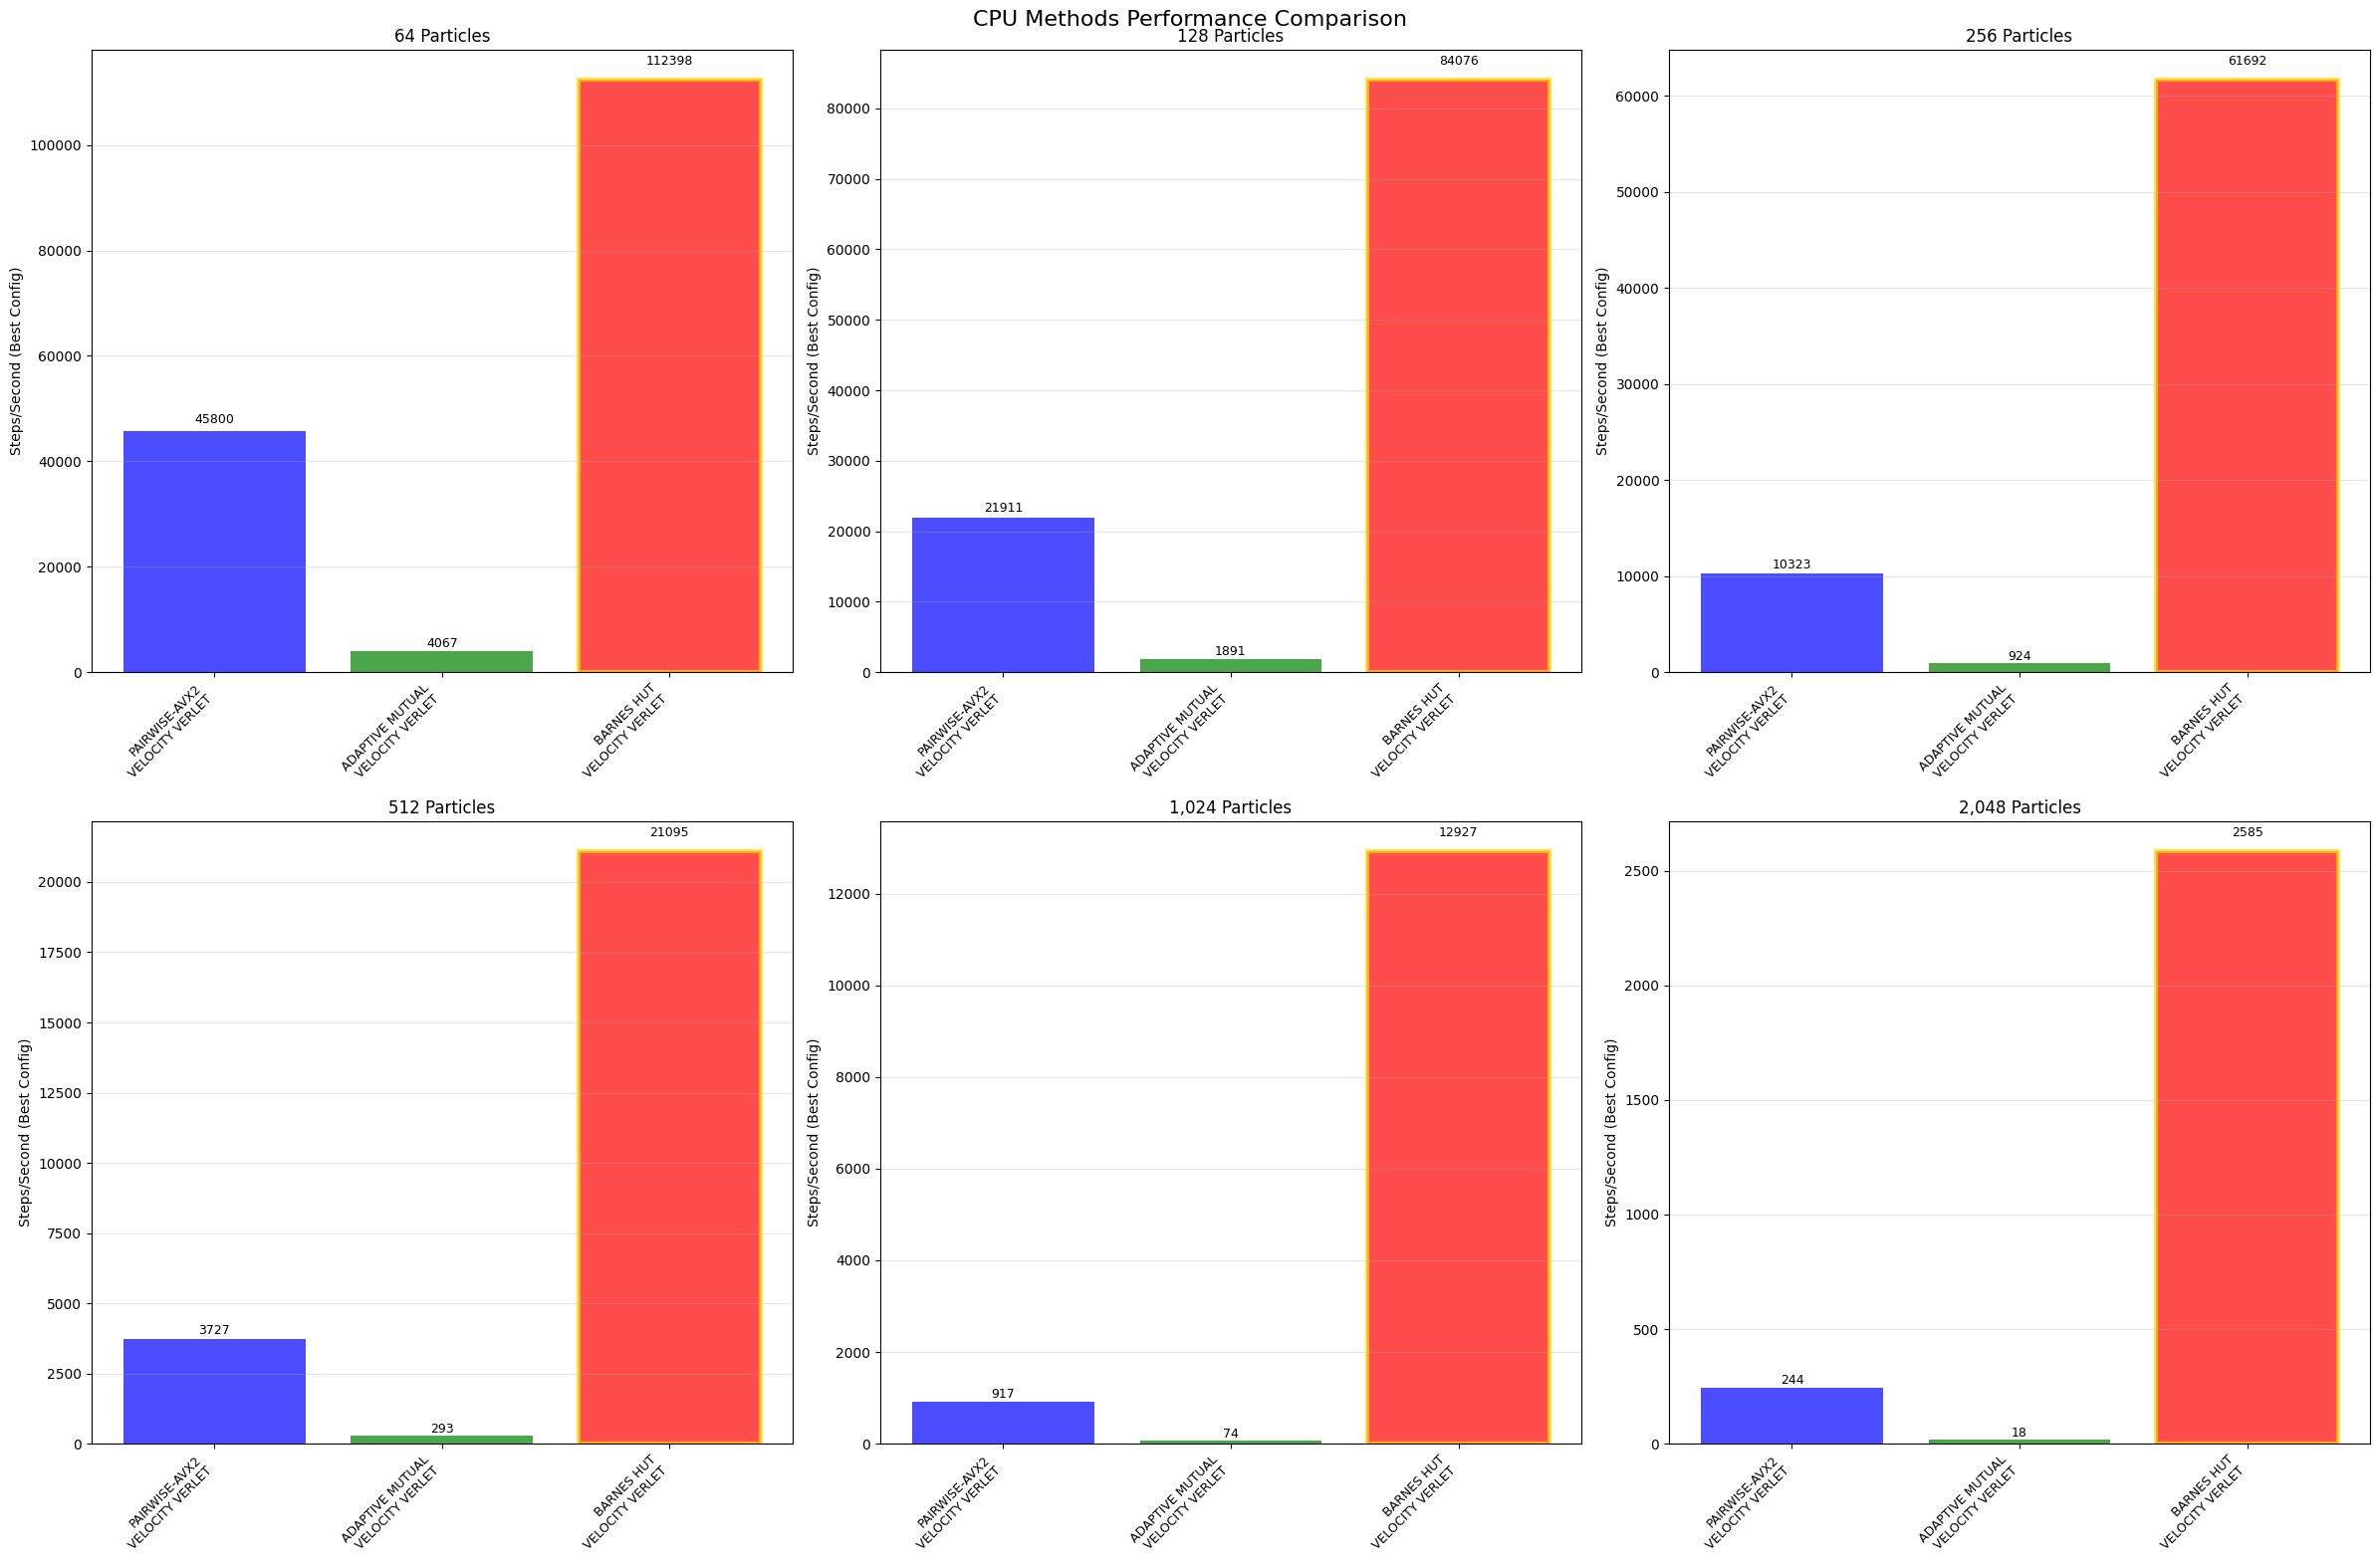

✅ Grafico 2: Confronto metodi completato


In [10]:
# 2. METODI COMPARISON (secondo grafico)
if data_available:
    
    fig, axes = plt.subplots(2, 3, figsize=(24, 16))
    fig.suptitle('CPU Methods Performance Comparison', fontsize=16)
    
    print("\n=== GRAFICO 2: CONFRONTO METODI ===")
    
    # Usa tutti i valori di particelle disponibili
    comparison_particles = sorted(df['NumParticles'].unique())
    
    for idx, particles in enumerate(comparison_particles):
        if idx >= 6:
            break
            
        ax = axes[idx // 3, idx % 3]
        
        particle_data = df[df['NumParticles'] == particles]
        
        if particle_data.empty:
            ax.text(0.5, 0.5, f'{particles:,} particles\nNo data', 
                   ha='center', va='center', transform=ax.transAxes)
            continue
        
        print(f"\n{particles:,} particles:")
        
        # Raggruppa per metodo e trova la migliore configurazione (threads)
        method_performances = []
        method_names = []
        method_colors = []
        
        color_map = {'PAIRWISE_AVX2/FP32': 'blue', 'ADAPTIVE_MUTUAL': 'green', 
                    'BARNES_HUT': 'red', 'PAIRWISE': 'orange'}
        
        for (force, integration) in main_combinations:
            combo_data = particle_data[(particle_data['ForceMethod'] == force) & 
                                      (particle_data['IntegrationMethod'] == integration)]
            
            if not combo_data.empty:
                # Trova la migliore configurazione di thread per questo metodo
                best_config = combo_data.loc[combo_data['MeanStepsPerSecond'].idxmax()]
                
                method_name = f"{force.replace('_AVX2/FP32', '-AVX2').replace('_', ' ')}\n{integration.replace('_', ' ')}"
                method_performances.append(best_config['MeanStepsPerSecond'])
                method_names.append(method_name)
                
                base_color = color_map.get(force, 'gray')
                method_colors.append(base_color)
                
                print(f"  {force}+{integration}: {best_config['MeanStepsPerSecond']:.0f} steps/sec "
                      f"({best_config['NumThreads']} threads)")
        
        if method_performances:
            # Bar plot con errori
            bars = ax.bar(range(len(method_names)), method_performances, 
                         color=method_colors, alpha=0.7, width=0.8)
            
            # Aggiungi valori sulle barre
            for bar, perf in zip(bars, method_performances):
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height + height*0.02,
                       f'{perf:.0f}', ha='center', va='bottom', fontsize=9)
            
            ax.set_xticks(range(len(method_names)))
            ax.set_xticklabels(method_names, rotation=45, ha='right', fontsize=9)
            ax.set_ylabel('Steps/Second (Best Config)')
            ax.set_title(f'{particles:,} Particles')
            ax.grid(True, alpha=0.3, axis='y')
            
            # Highlight il metodo migliore
            best_idx = method_performances.index(max(method_performances))
            bars[best_idx].set_edgecolor('gold')
            bars[best_idx].set_linewidth(3)
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Grafico 2: Confronto metodi completato")


=== GRAFICO 3: EFFICIENCY ANALYSIS ===


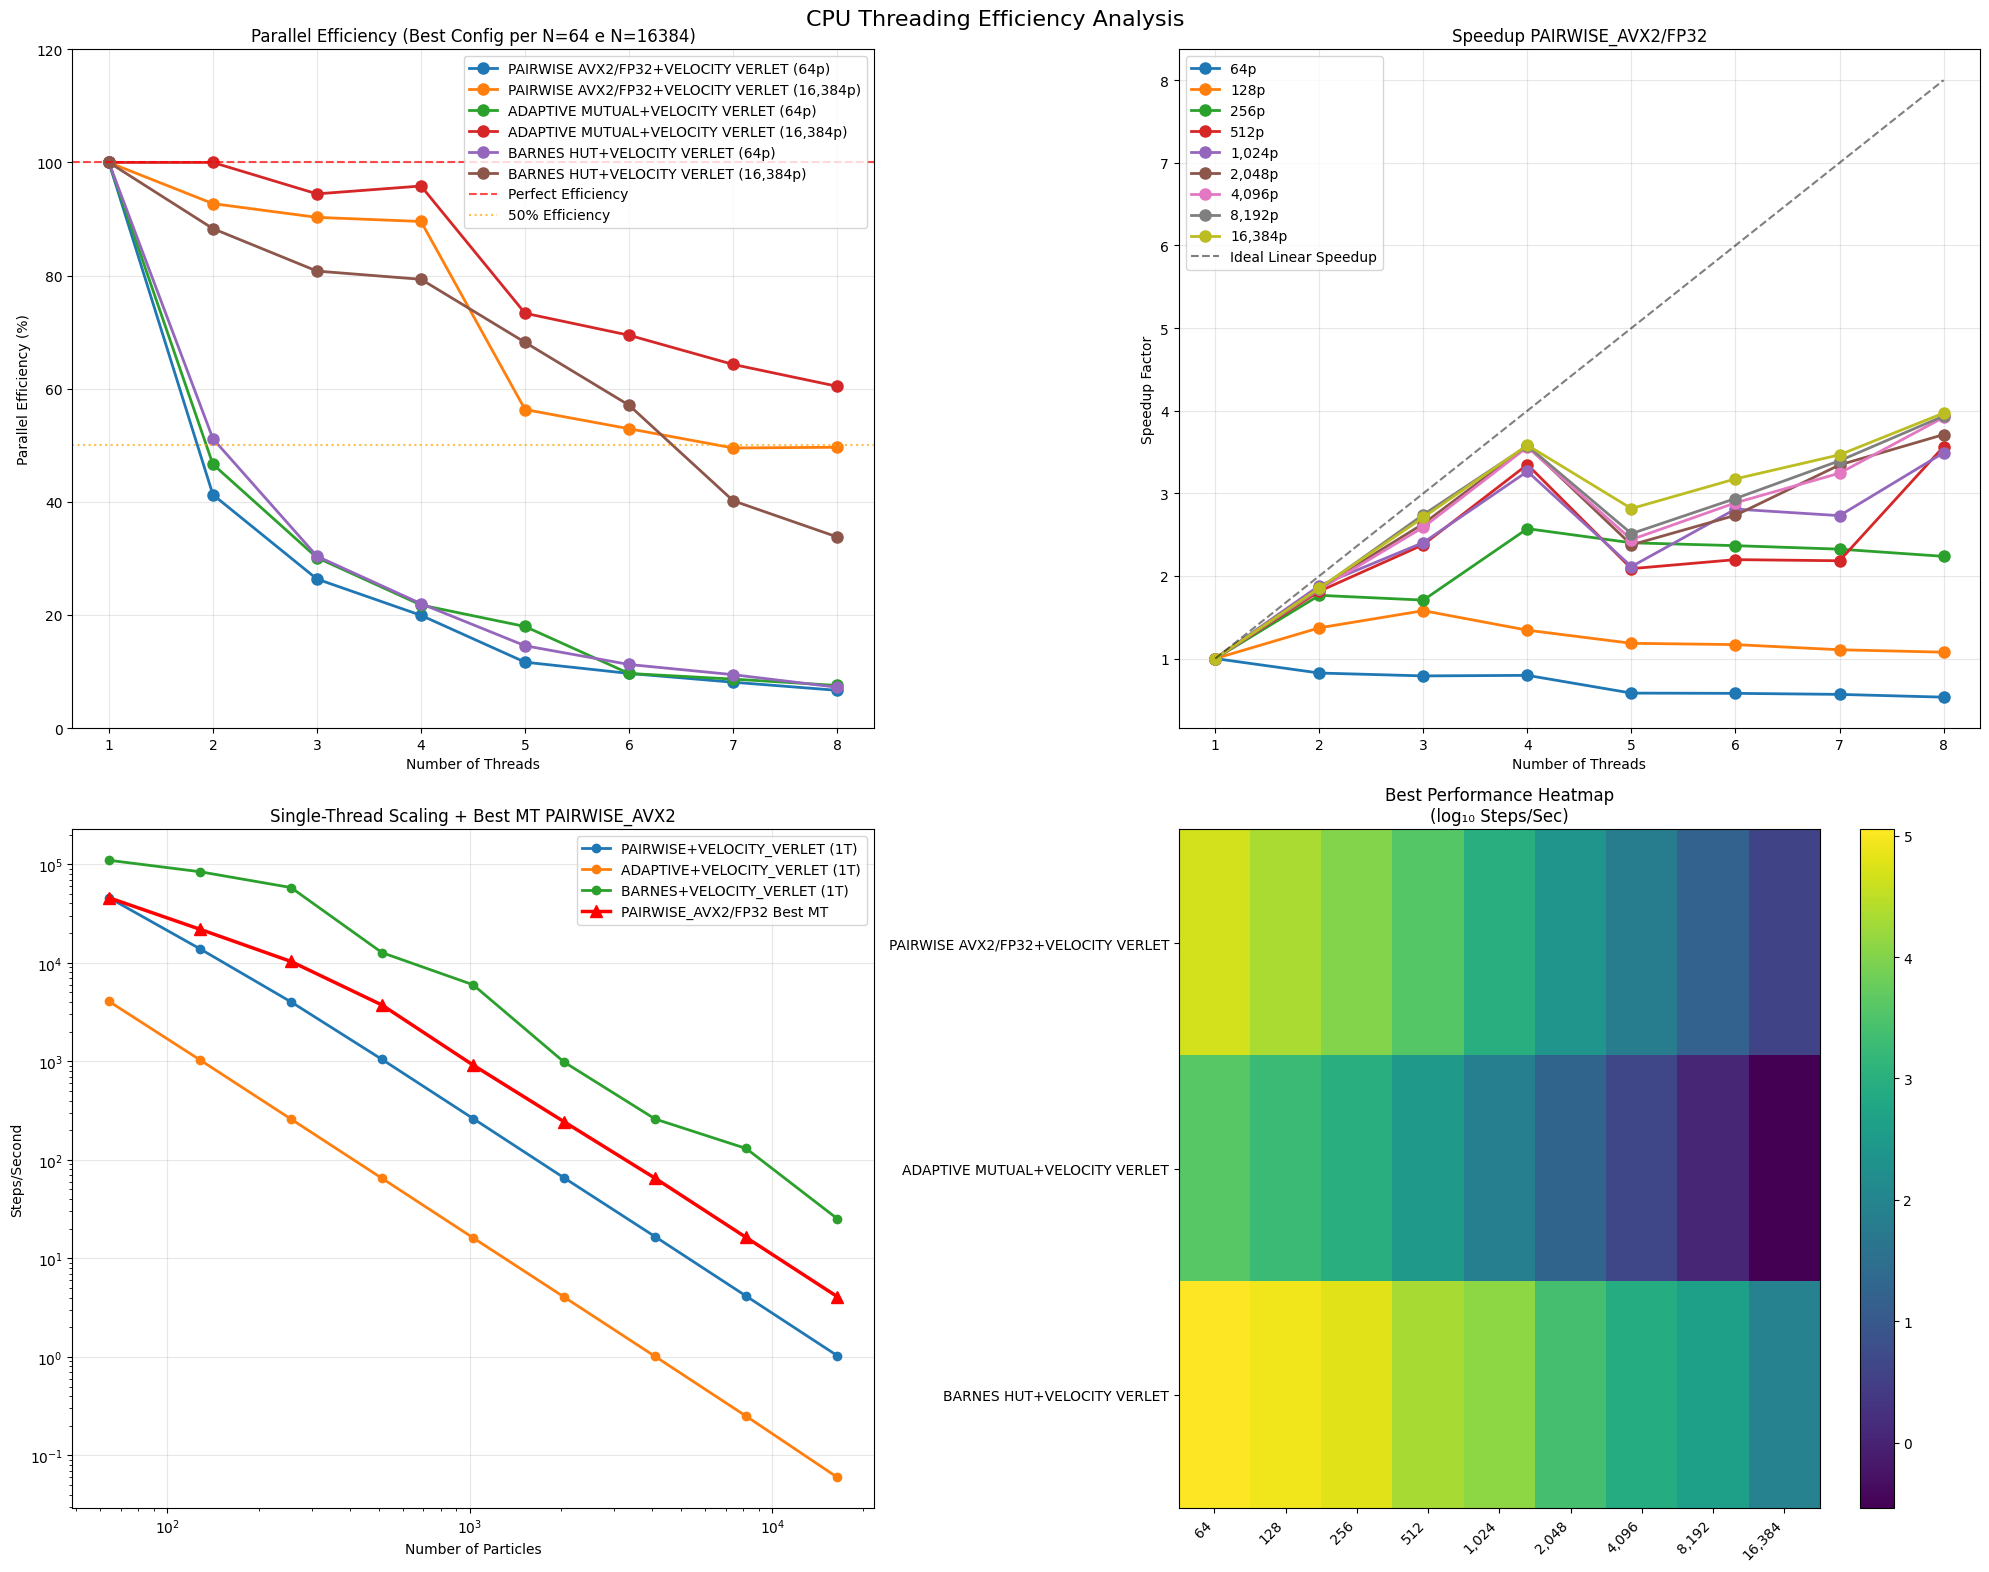

✅ Grafico 3: Efficiency analysis completato


In [17]:
# 3. EFFICIENCY ANALYSIS (terzo grafico)
if data_available:
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    fig.suptitle('CPU Threading Efficiency Analysis', fontsize=16)
    print("\n=== GRAFICO 3: EFFICIENCY ANALYSIS ===")

    # --- PRIMO GRAFICO: Parallel Efficiency per tutte le configurazioni di thread ---
    ax1 = axes[0, 0]
    representative_methods = main_combinations[:3]
    all_particles = sorted(df['NumParticles'].unique())
    N_min, N_max = all_particles[0], all_particles[-1]

    for force_method, int_method in representative_methods:
        for particles in [N_min, N_max]:
            method_data = df[(df['ForceMethod'] == force_method) &
                            (df['IntegrationMethod'] == int_method) &
                            (df['NumParticles'] == particles)]
            if not method_data.empty:
                method_data_sorted = method_data.sort_values('NumThreads')
                baseline = method_data_sorted[method_data_sorted['NumThreads'] == 1]['MeanStepsPerSecond']
                if not baseline.empty:
                    baseline_perf = baseline.iloc[0]
                    efficiencies = []
                    thread_counts = []
                    for _, row in method_data_sorted.iterrows():
                        threads = row['NumThreads']
                        actual_speedup = row['MeanStepsPerSecond'] / baseline_perf
                        efficiency = (actual_speedup / threads) * 100
                        efficiencies.append(efficiency)
                        thread_counts.append(threads)
                    label = f"{force_method.replace('_', ' ')}+{int_method.replace('_', ' ')} ({particles:,}p)"
                    ax1.plot(thread_counts, efficiencies, 'o-', label=label, linewidth=2, markersize=8)

    ax1.axhline(y=100, color='red', linestyle='--', alpha=0.7, label='Perfect Efficiency')
    ax1.axhline(y=50, color='orange', linestyle=':', alpha=0.7, label='50% Efficiency')
    ax1.set_xlabel('Number of Threads')
    ax1.set_ylabel('Parallel Efficiency (%)')
    ax1.set_title(f'Parallel Efficiency (Best Config per N={N_min} e N={N_max})')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(0, 120)

    # --- SECONDO GRAFICO: SOLO PAIRWISE_AVX2/FP32 ---
    ax2 = axes[0, 1]
    force_method = 'PAIRWISE_AVX2/FP32'
    int_method = 'VELOCITY_VERLET'
    for particles in all_particles:
        method_data = df[(df['ForceMethod'] == force_method) &
                         (df['IntegrationMethod'] == int_method) &
                         (df['NumParticles'] == particles)]
        if not method_data.empty:
            method_data_sorted = method_data.sort_values('NumThreads')
            baseline = method_data_sorted[method_data_sorted['NumThreads'] == 1]['MeanStepsPerSecond']
            if not baseline.empty:
                baseline_perf = baseline.iloc[0]
                speedups = method_data_sorted['MeanStepsPerSecond'] / baseline_perf
                ax2.plot(method_data_sorted['NumThreads'], speedups, 'o-',
                         label=f"{particles:,}p", linewidth=2, markersize=8)
    max_threads = df['NumThreads'].max()
    thread_range = range(1, max_threads + 1)
    ax2.plot(thread_range, thread_range, 'k--', alpha=0.5, label='Ideal Linear Speedup')
    ax2.set_xlabel('Number of Threads')
    ax2.set_ylabel('Speedup Factor')
    ax2.set_title('Speedup PAIRWISE_AVX2/FP32')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # --- TERZO GRAFICO: SINGLE THREAD SCALING + LINEA ROSSA BEST MULTITHREAD ---
    ax3 = axes[1, 0]
    # Single-thread performance scaling
    for force_method, int_method in representative_methods:
        single_thread_data = df[(df['ForceMethod'] == force_method) &
                               (df['IntegrationMethod'] == int_method) &
                               (df['NumThreads'] == 1)]
        if len(single_thread_data) >= 3:
            single_thread_sorted = single_thread_data.sort_values('NumParticles')
            method_label = f"{force_method.split('_')[0]}+{int_method} (1T)"
            ax3.loglog(single_thread_sorted['NumParticles'],
                       single_thread_sorted['MeanStepsPerSecond'],
                       'o-', label=method_label, linewidth=2, markersize=6)

    # Linea rossa: best performer PAIRWISE_AVX2/FP32 con più thread
    best_mt_data = df[(df['ForceMethod'] == 'PAIRWISE_AVX2/FP32') &
                      (df['IntegrationMethod'] == 'VELOCITY_VERLET')]
    best_mt_perfs = []
    best_mt_particles = []
    for particles in all_particles:
        data_n = best_mt_data[best_mt_data['NumParticles'] == particles]
        if not data_n.empty:
            best_row = data_n.loc[data_n['MeanStepsPerSecond'].idxmax()]
            best_mt_perfs.append(best_row['MeanStepsPerSecond'])
            best_mt_particles.append(particles)
    if best_mt_perfs:
        ax3.loglog(best_mt_particles, best_mt_perfs, 'r^-', label='PAIRWISE_AVX2/FP32 Best MT', linewidth=2.5, markersize=8)

    ax3.set_xlabel('Number of Particles')
    ax3.set_ylabel('Steps/Second')
    ax3.set_title('Single-Thread Scaling + Best MT PAIRWISE_AVX2')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # --- QUARTO GRAFICO: HEATMAP ---
    ax4 = axes[1, 1]
    particles_range = all_particles
    methods_range = [f"{f}+{i}" for f, i in main_combinations[:5]]
    heatmap_data = np.zeros((len(methods_range), len(particles_range)))
    for i, (force_method, int_method) in enumerate(main_combinations[:5]):
        for j, particles in enumerate(particles_range):
            method_data = df[(df['ForceMethod'] == force_method) &
                            (df['IntegrationMethod'] == int_method) &
                            (df['NumParticles'] == particles)]
            if not method_data.empty:
                best_perf = method_data['MeanStepsPerSecond'].max()
                heatmap_data[i, j] = np.log10(best_perf) if best_perf > 0 else 0
    im = ax4.imshow(heatmap_data, cmap='viridis', aspect='auto')
    ax4.set_xticks(range(len(particles_range)))
    ax4.set_xticklabels([f'{p:,}' for p in particles_range], rotation=45, ha='right')
    ax4.set_yticks(range(len(methods_range)))
    ax4.set_yticklabels([m.replace('_', ' ') for m in methods_range])
    ax4.set_title('Best Performance Heatmap\n(log₁₀ Steps/Sec)')
    plt.colorbar(im, ax=ax4)

    plt.tight_layout()
    plt.show()
    print("✅ Grafico 3: Efficiency analysis completato")


In [6]:
# 4. STATISTICHE RIASSUNTIVE E INSIGHTS
if data_available:
    
    print("\n=== ANALISI STATISTICHE RIASSUNTIVE ===")
    
    # Thread efficiency summary
    print("THREAD EFFICIENCY SUMMARY:")
    
    efficiency_summary = []
    
    for force_method, int_method in main_combinations:
        for particles in [1000, 5000, 10000]:
            method_data = df[(df['ForceMethod'] == force_method) & 
                            (df['IntegrationMethod'] == int_method) & 
                            (df['NumParticles'] == particles)]
            
            if len(method_data) > 1:
                baseline = method_data[method_data['NumThreads'] == 1]['MeanStepsPerSecond']
                if not baseline.empty:
                    baseline_perf = baseline.iloc[0]
                    
                    # Trova la migliore configurazione multi-thread
                    best_multi = method_data[method_data['NumThreads'] > 1]
                    if not best_multi.empty:
                        best_perf = best_multi['MeanStepsPerSecond'].max()
                        best_threads = best_multi.loc[best_multi['MeanStepsPerSecond'].idxmax(), 'NumThreads']
                        
                        speedup = best_perf / baseline_perf
                        efficiency = (speedup / best_threads) * 100
                        
                        efficiency_summary.append({
                            'Method': f"{force_method.split('_')[0]}+{int_method}",
                            'Particles': particles,
                            'Best_Threads': best_threads,
                            'Speedup': speedup,
                            'Efficiency': efficiency,
                            'Single_Perf': baseline_perf,
                            'Multi_Perf': best_perf
                        })
    
    if efficiency_summary:
        efficiency_df = pd.DataFrame(efficiency_summary)
        
        # Raggruppa per metodo
        print("\nPer metodo (media su diverse N):")
        method_stats = efficiency_df.groupby('Method').agg({
            'Speedup': ['mean', 'std', 'max'],
            'Efficiency': ['mean', 'std', 'min'],
            'Best_Threads': 'median'
        }).round(2)
        
        print(method_stats.to_string())
        
        # Top performers
        print(f"\nTOP 5 SPEEDUPS:")
        top_speedups = efficiency_df.nlargest(5, 'Speedup')
        for _, row in top_speedups.iterrows():
            print(f"  {row['Method']}, {row['Particles']:,}p: {row['Speedup']:.2f}x ({row['Best_Threads']} threads, {row['Efficiency']:.1f}% eff)")
        
        # Scaling insights
        print(f"\nSCALING INSIGHTS:")
        
        # Analizza come cambia l'efficiency con N
        for method in efficiency_df['Method'].unique():
            method_data = efficiency_df[efficiency_df['Method'] == method].sort_values('Particles')
            if len(method_data) >= 3:
                particles = method_data['Particles'].values
                efficiencies = method_data['Efficiency'].values
                
                # Linear fit per vedere il trend
                slope, intercept, r_value, _, _ = stats.linregress(np.log10(particles), efficiencies)
                
                print(f"  {method}: efficiency trend = {slope:.2f}%/decade, R² = {r_value**2:.3f}")
    
    # Metodo comparison per numero di particelle
    print(f"\n=== BEST METHOD PER NUMERO DI PARTICELLE ===")
    
    best_by_particles = {}
    
    for particles in sorted(df['NumParticles'].unique()):
        particle_data = df[df['NumParticles'] == particles]
        
        method_performances = []
        
        for force_method, int_method in main_combinations:
            combo_data = particle_data[(particle_data['ForceMethod'] == force_method) & 
                                      (particle_data['IntegrationMethod'] == int_method)]
            
            if not combo_data.empty:
                best_perf = combo_data['MeanStepsPerSecond'].max()
                best_config = combo_data.loc[combo_data['MeanStepsPerSecond'].idxmax()]
                
                method_performances.append({
                    'Method': f"{force_method}+{int_method}",
                    'Performance': best_perf,
                    'Threads': best_config['NumThreads'],
                    'CV': best_config['CVStepsPerSecond']
                })
        
        if method_performances:
            best_method = max(method_performances, key=lambda x: x['Performance'])
            best_by_particles[particles] = best_method
            
            print(f"{particles:>6,} particles: {best_method['Method']} "
                  f"({best_method['Performance']:.0f} steps/sec, {best_method['Threads']}T, "
                  f"CV={best_method['CV']*100:.1f}%)")
    
    # Transition points
    print(f"\nTRANSITION POINTS:")
    prev_method = None
    for particles, method_info in best_by_particles.items():
        current_method = method_info['Method']
        if prev_method and prev_method != current_method:
            print(f"  {particles:,} particles: {prev_method} → {current_method}")
        prev_method = current_method
    
    print("\n✅ Analisi CPU methods scaling completata!")
    print("🎯 I 3 grafici mostrano: scalabilità thread, confronto metodi, analisi efficiency")


=== ANALISI STATISTICHE RIASSUNTIVE ===
THREAD EFFICIENCY SUMMARY:

=== BEST METHOD PER NUMERO DI PARTICELLE ===
    64 particles: BARNES_HUT+VELOCITY_VERLET (112398 steps/sec, 2T, CV=2.1%)
   128 particles: BARNES_HUT+VELOCITY_VERLET (84076 steps/sec, 1T, CV=4.4%)
   256 particles: BARNES_HUT+VELOCITY_VERLET (61692 steps/sec, 2T, CV=2.8%)
   512 particles: BARNES_HUT+VELOCITY_VERLET (21095 steps/sec, 8T, CV=11.1%)
 1,024 particles: BARNES_HUT+VELOCITY_VERLET (12927 steps/sec, 4T, CV=4.0%)
 2,048 particles: BARNES_HUT+VELOCITY_VERLET (2585 steps/sec, 4T, CV=10.3%)
 4,096 particles: BARNES_HUT+VELOCITY_VERLET (839 steps/sec, 8T, CV=0.9%)
 8,192 particles: BARNES_HUT+VELOCITY_VERLET (418 steps/sec, 7T, CV=0.1%)
16,384 particles: BARNES_HUT+VELOCITY_VERLET (87 steps/sec, 6T, CV=2.5%)

TRANSITION POINTS:

✅ Analisi CPU methods scaling completata!
🎯 I 3 grafici mostrano: scalabilità thread, confronto metodi, analisi efficiency
